# Telecom Churn - Group Case Study

In [42]:
# Import required lib and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [67]:

tc_data = pd.read_csv('telecom_churn_data.csv')

In [68]:

tc_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [69]:

tc_data.shape

(99999, 226)

In [70]:

tc_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [47]:

tc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [71]:
tc_data.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [49]:
#categoring columns 

In [72]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [73]:
# The number of columns in each list
print("#id_cols: %d\n#date_cols:%d\n#cat_cols:%d\n#num_cols:%d" % (len(id_cols), len(date_cols), len(cat_cols), len(num_cols)))

#id_cols: 2
#date_cols:12
#cat_cols:8
#num_cols:204


In [74]:
# checking to see if any columnns are missed
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) )
print(len(tc_data.columns))

226
226


In [75]:
# Check missing/null values
(tc_data.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

In [76]:
## Because we don't have data for average recharge amount, maximum recharge data, total recharge date, 
##and mobile internet data recharge date,
## we can say that roughly 74-75% of the entries in these columns are empty or missing.

In [77]:
# 1 is the min value for recharge column
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

tc_data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [16]:
# we observe from above that there are 3 set of values for

#total recharge amount,
#maximum recharge amount and
#average recharge amount for data.
#total recharge for data
#maximum recharge for data

In [78]:
# recharge date and the recharge value are missing because customer didn't recharge 
  
tc_data.loc[tc_data.total_rech_data_7.isnull() & tc_data.date_of_last_rech_data_7.isnull(),\
          ["total_rech_data_7", "date_of_last_rech_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN


In [79]:
#Let's impute 0 in recharge columns as cuustomer didn't recharge
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [80]:
# Now impute missing values with 0
tc_data[zero_impute_rch] = tc_data[zero_impute_rch].apply(lambda x: x.fillna(0))

In [81]:
print(tc_data[zero_impute_rch].isnull().sum()*100/tc_data.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [82]:
#  checking unique values in each column
tc_data.nunique().sort_values(ascending=False)

mobile_number       99999
arpu_6              85681
arpu_7              85308
arpu_8              83615
arpu_9              79937
                    ...  
std_og_t2c_mou_9        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_6        1
Length: 226, dtype: int64

In [83]:
# Dropping the id_cols and date_cols
tc_data = tc_data.drop(id_cols + date_cols, axis=1)
df.shape

(99999, 226)

In [84]:
# replace missing values with '-1' in categorical columns
tc_data[cat_cols] = tc_data[cat_cols].apply(lambda x: x.fillna(-1))

In [85]:
# check data once again

print(tc_data[cat_cols].isnull().sum()*100/tc_data.shape[0])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [87]:
#Drop variables with more than a 70% of missing values

initial_cols = tc_data.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(tc_data.apply(lambda column: True if column.isnull().sum()/tc_data.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':tc_data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]


,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
207,aon,True
208,aug_vbc_3g,True
209,jul_vbc_3g,True
210,jun_vbc_3g,True


In [88]:
# drop columns
tc_data = tc_data.loc[:, include_cols]

dropped_cols = tc_data.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [89]:
# imputing the respective null columns as 0. 
tc_data[tc_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = tc_data[tc_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [90]:
# Filter high-value customers by Observing recharge columns
rch_df=tc_data.columns[tc_data.columns.str.contains('rech_amt|rech_data')]
rch_df

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [91]:
# checking for missing/null values in recharge columns
100*tc_data.loc[:,rch_df].isnull().sum()/len(tc_data)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [ ]:
#no missing values 

In [92]:
tc_data.loc[:,rch_df].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,0.619726,0.681837,0.698517,0.632806,31.792048,32.406314,33.113011,32.387644,48.445409,51.393440,52.027022,49.961089
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,1.760541,1.924382,1.963417,1.669040,77.248778,78.342435,78.872739,78.818696,127.743863,132.629365,131.182609,127.804280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,17.000000,8.250000,17.000000,23.000000,17.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [94]:
tc_data.loc[:,rch_df].head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0
1,74.0,384.0,283.0,121.0,44.0,154.0,65.0,50.0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,154.0,50.0,0.0
2,168.0,315.0,116.0,358.0,86.0,200.0,86.0,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,230.0,310.0,601.0,410.0,60.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,196.0,350.0,287.0,200.0,56.0,110.0,110.0,50.0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


In [95]:
# checking values for june month only
rch_df_6=tc_data.columns[tc_data.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]
tc_data.loc[:,rch_df_6].head(10)

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,362.0,252.0,1.0,252.0,252.0
1,74.0,44.0,0.0,0.0,0.0
2,168.0,86.0,0.0,0.0,0.0
3,230.0,60.0,0.0,0.0,0.0
4,196.0,56.0,1.0,56.0,56.0
5,120.0,120.0,0.0,0.0,0.0
6,499.0,90.0,0.0,0.0,0.0
7,1580.0,1580.0,0.0,0.0,0.0
8,437.0,90.0,0.0,0.0,0.0
9,220.0,110.0,0.0,0.0,0.0


In [97]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
tc_data['total_data_rech_6'] = tc_data.total_rech_data_6 * tc_data.av_rech_amt_data_6
tc_data['total_data_rech_7'] = tc_data.total_rech_data_7 * tc_data.av_rech_amt_data_7

In [98]:
any(df.total_rech_amt_6.isna())

False

In [99]:
any(df.total_rech_amt_7.isna())

False

In [100]:
# Total recharge amount for June and July 
tc_data['amt_data_6'] = tc_data.total_rech_amt_6 + df.total_data_rech_6
tc_data['amt_data_7'] = tc_data.total_rech_amt_7 + df.total_data_rech_7

In [101]:
# average recharge done by customer in June and July
tc_data['av_amt_data_6_7'] = (tc_data.amt_data_6 + tc_data.amt_data_7)/2

In [102]:
tc_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,...,968.0,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,...,1006.0,0.0,0.0,0.00,0.00,0.0,154.0,NaN,538.0,NaN
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,...,1103.0,0.0,0.0,4.17,0.00,0.0,0.0,NaN,NaN,NaN
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,...,2491.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN,NaN,NaN
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,...,1526.0,0.0,0.0,0.00,0.00,56.0,0.0,252.0,NaN,NaN


In [108]:
tc_data[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,NaN,0.0,154.0,NaN,538.0
2,NaN,0.0,0.0,NaN,NaN
3,NaN,0.0,0.0,NaN,NaN
4,NaN,56.0,0.0,252.0,NaN


In [46]:
## High Value customers - those customers who recharged for more than equal to 'a', 
## where a is 70th perce percentile of the average recharge amount in the first two months (the good phase)
#Filter high-value customers


In [104]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(tc_data.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 1212.0


In [106]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
high_val_cust = tc_data.loc[tc_data.av_amt_data_6_7 > tc_data.av_amt_data_6_7.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(5572, 201)

In [109]:
print("Number of rows before filtering the high value customers =", len(df))

Number of rows before filtering the high value customers = 99999


In [110]:
print("Number of rows after filtering the high value customers =", len(high_val_cust))

Number of rows after filtering the high value customers = 5572


In [111]:
# delete variables created to filter high-value customers
high_val_cust = high_val_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_val_cust.shape

(5572, 196)

In [112]:
high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(196)
memory usage: 8.3 MB


In [53]:
# Churn Derivation

In [113]:
#  total incoming and outgoing minutes of usage
high_val_cust['total_calls_mou_9'] = high_val_cust.total_ic_mou_9 + high_val_cust.total_og_mou_9

In [114]:
#     2g and 3g data consumption
high_val_cust['total_internet_mb_9'] =  high_val_cust.vol_2g_mb_9 + high_val_cust.vol_3g_mb_9

In [56]:

#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
## Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

#The attributes you need to use to tag churners are:

#total_ic_mou_9
#total_og_mou_9
#vol_2g_mb_9
#vol_3g_mb_9

In [115]:
# Those who have not used either calls or internet in  September are churned customers

# Let's denote 0 as not churn and  1 as churn
high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [58]:
# cross checking if churn customers are tagged properly

In [116]:
high_val_cust[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0,114.16,1.70,30.92,5588.11
1,0,680.61,503.06,0.82,0.00
2,0,225.34,127.48,137.12,835.99
3,0,1047.41,326.29,22.05,4305.54
4,0,428.63,1252.48,14.59,135.70
...,...,...,...,...,...
5567,1,0.00,0.00,0.00,0.00
5568,0,189.38,2272.66,96.11,1708.91
5569,0,157.04,33.91,0.00,0.00
5570,0,135.29,1263.56,69.40,1777.24


In [60]:
#After defining the y variable by tagging churners delete the columns having _9 attribute in their name
#After tagging churners, remove all the attributes corresponding to the churn phase
#(all attributes having ‘ _9’, etc. in their names).
#Get the list of columns which has name ends with _9 attribute

In [117]:
# find the columns which has name ends with _9 attribute
month_9_cols = high_val_cust.columns[high_val_cust.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_cols

The columns names ends with _9 are given below...


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9', 'total_calls_mou_9', 'total_internet_mb_9'],
      dtype='object')

In [118]:
# removing those columns
high_val_cust = high_val_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [119]:
# change data type to category
high_val_cust.churn = high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

Churn Ratio:
0    94.723618
1     5.276382
Name: churn, dtype: float64


In [64]:
# We observee that approx 5% high value customers are chuurnned 

In [65]:
#calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [120]:
high_val_cust['arpu_diff'] = high_val_cust.arpu_8 - ((high_val_cust.arpu_6 + high_val_cust.arpu_7)/2)

high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)

high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)

high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)

high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)

high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)

high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)

high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)

high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)

high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)

high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)

high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)

high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)

high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)

high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)

high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)

high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)

high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)

high_val_cust['total_rech_data_diff'] = high_val_cust.total_rech_data_8 - ((high_val_cust.total_rech_data_6 + high_val_cust.total_rech_data_7)/2)

high_val_cust['max_rech_data_diff'] = high_val_cust.max_rech_data_8 - ((high_val_cust.max_rech_data_6 + high_val_cust.max_rech_data_7)/2)

high_val_cust['av_rech_amt_data_diff'] = high_val_cust.av_rech_amt_data_8 - ((high_val_cust.av_rech_amt_data_6 + high_val_cust.av_rech_amt_data_7)/2)

high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)

high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

In [122]:
high_val_cust['total_og_mou_diff'].describe()

count    5572.000000
mean      -37.946358
std       425.343196
min     -4639.405000
25%       -95.650000
50%        -5.535000
75%        49.175000
max      4890.815000
Name: total_og_mou_diff, dtype: float64

In [123]:
#  9th Month (churned month) Columns
col_9 =  high_val_cust.columns[high_val_cust.columns.str.contains('_9')]

In [124]:
#  all names ending with 9
col_9 = high_val_cust.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9]
cat_cols.append('churn')
num_cols = [col for col in high_val_cust.columns if col not in cat_cols]

In [125]:
# change column types
high_val_cust[num_cols] = high_val_cust[num_cols].apply(pd.to_numeric)
high_val_cust[cat_cols] = high_val_cust[cat_cols].apply(lambda column: column.astype("category"), axis=0)

# EDA

In [126]:
#  checking data type and their respective couunts
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


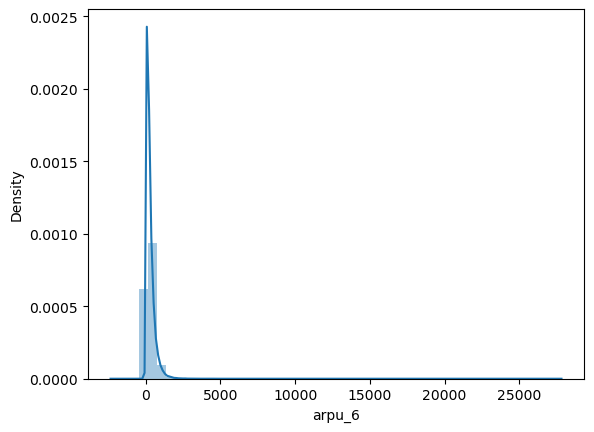

In [127]:
univariate(tc_data.arpu_6)

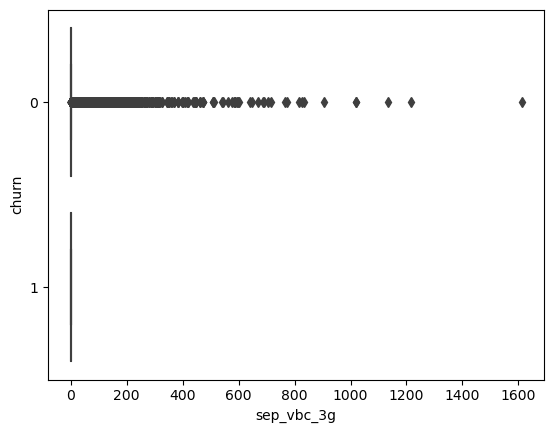

In [128]:
bivariate(high_val_cust.sep_vbc_3g, high_val_cust.churn)

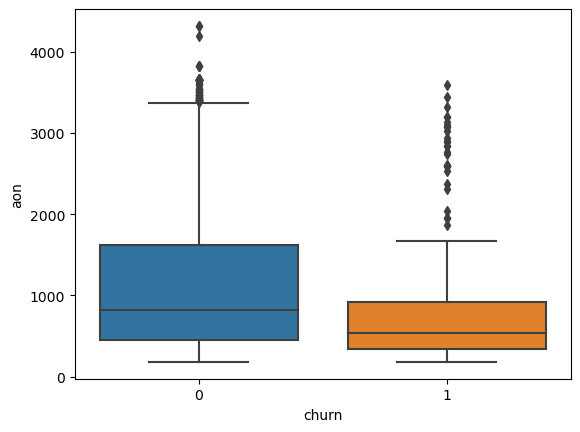

In [129]:
bivariate(high_val_cust.churn, high_val_cust.aon)

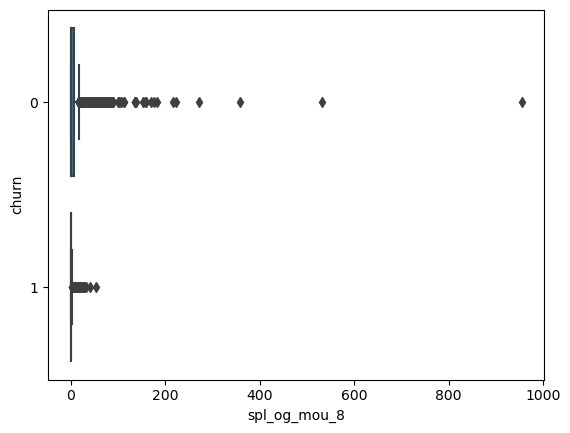

In [130]:
bivariate(high_val_cust.spl_og_mou_8, high_val_cust.churn)

count    92254.000000
mean       190.337222
std        319.396092
min          0.000000
25%         27.130000
50%         87.290000
75%        220.505000
max      10310.760000
Name: offnet_mou_9, dtype: float64


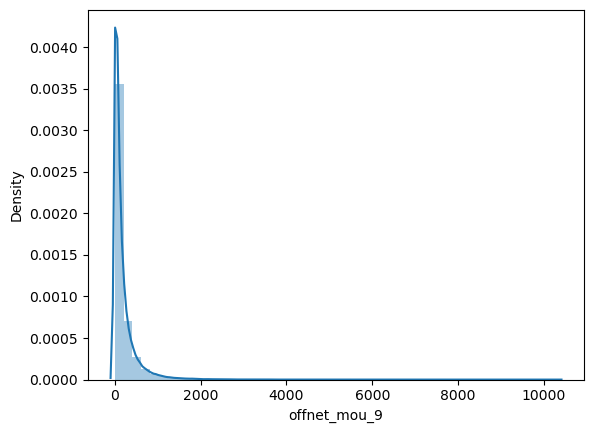

In [131]:
univariate(df.offnet_mou_9)

count    94621.000000
mean       133.018098
std        308.951589
min          0.000000
25%          6.460000
50%         32.360000
75%        115.860000
max      10752.560000
Name: onnet_mou_8, dtype: float64


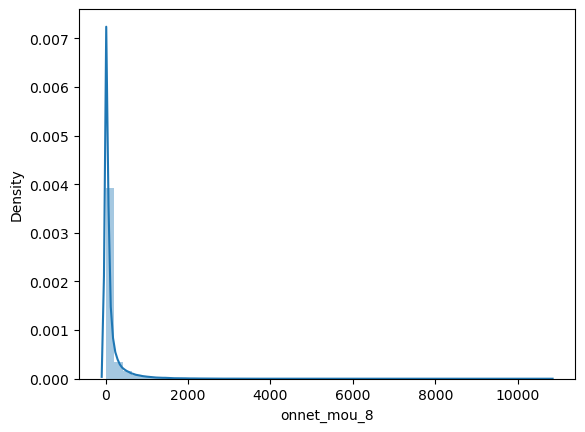

In [132]:
univariate(df.onnet_mou_8)

In [133]:
high_val_cust.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=220)

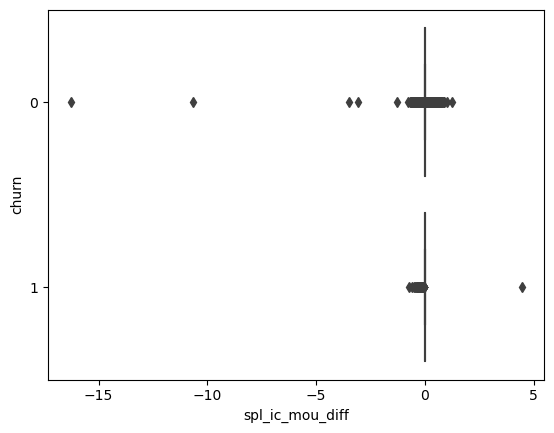

In [134]:
bivariate(high_val_cust.spl_ic_mou_diff, high_val_cust.churn)

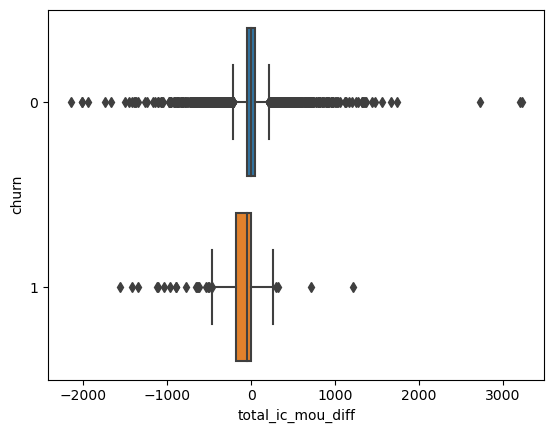

In [135]:
bivariate(high_val_cust.total_ic_mou_diff, high_val_cust.churn)

In [137]:
print('Summary metrics - Numeric Variables')

numeric_df = (high_val_cust.iloc[:,0:20])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,20:40])._get_numeric_data()
print(numeric_df.describe())
  
numeric_df = (high_val_cust.iloc[:,40:60])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,60:80])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,80:100])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,100:120])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,120:140])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,140:160])._get_numeric_data()
print(numeric_df.describe())

Summary metrics - Numeric Variables
       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou       arpu_6  \
count          5572.0          5572.0          5572.0  5572.000000   
mean              0.0             0.0             0.0   662.843068   
std               0.0             0.0             0.0   503.084351   
min               0.0             0.0             0.0     0.000000   
25%               0.0             0.0             0.0   294.649250   
50%               0.0             0.0             0.0   550.466000   
75%               0.0             0.0             0.0   890.414750   
max               0.0             0.0             0.0  6636.431000   

            arpu_7       arpu_8       arpu_9  onnet_mou_6  onnet_mou_7  \
count  5572.000000  5572.000000  5572.000000  5572.000000  5572.000000   
mean    674.643483   603.143303   560.397072   189.865551   194.891423   
std     514.445355   523.688364   523.471586   428.605355   475.774905   
min      -0.172000   -17.854000   -43

In [83]:
#EDA - Summary
# Calls Revenue(3 columns):
#Invalid Values : Having minimum values as negatives, indicating some customers are making loss to the company. These columns are either invalid or not adding value to our prediction, can be dropped from the dataset.

#Standardise: Revenue columns can be rounded to 2 decimal places.

#Minutes of usage(60+ columns):
#Usage minutes is generally 0 except for few outliers, for below variables:
#Roaming Incoming ISD Incoming Special Incoming Others STD incoming T2F STD outgoing T2F Outgoing Others ISD Outgoing Local Outgoing T2C (Customer care calls)

#Most of the columns have outliers.

# Aggregating Columns based on Incoming and Outgoing, or Aggregating based on Each Type of Incoming Calls and Outgoing Calls and looking at the metrics will give a better understanding of the data.

#Recharge (12 Numeric + 3 Date columns)
#Data Type Conversion:

#Data in numeric columns are integers, so can be converted to int type.
#Date columns need to be converted to date type
#Data 2G And 3G(22 Columns)
#Most of the columns have median as O and have outliers

#vbc_3g columns need column renaming as it needs month to be encoded to its number.

#Standardise: Columns can be rounded off to 2 decimal places.

#Age on Network (1 Column)
#Feature can be derived from AON column.

#Churn (Dependent Variable)
#There exists a Class Imbalance in the dataset, where actual churn customers are only 6% of the dataset.

#Reviewing the Dropped Columns:
#More columns will be lost because of dropping missing value columns, while it can be handled to be imputed by considered 0 as missing values follow a pattern where Calls only users have blanks for Data related columns and the vice versa.

#Feature Engineering - Thoughts
#Derive no. of years the customer is using network from AON
#Derive fields to indicate the type of user the customer is: Uses Both Calls and Data, Only Calls, Only Data, Only Incoming calls, Only Outgoing calls, etc.
#Bin the customers into different segments based on Service usage, Recharge amount, Usage/Recharge pattern.
#Calls to Customer Care is a Key indicator that customer is not happy with the services, derive columns like time over call

In [138]:
# create function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": high_val_cust[high_val_cust["churn"] == churn][cols[6]].mean(),
        "mean_7": high_val_cust[high_val_cust["churn"] == churn][cols[7]].mean(),
        "mean_8": high_val_cust[high_val_cust["churn"] == churn][cols[8]].mean(),
        "std_6": high_val_cust[high_val_cust["churn"] == churn][cols[6]].std(),
        "std_7": high_val_cust[high_val_cust["churn"] == churn][cols[7]].std(),
        "std_8": high_val_cust[high_val_cust["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=high_val_cust, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=high_val_cust, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=high_val_cust, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,772.04,792.33,713.49,597.24,617.52,621.5
Churned,828.83,773.61,346.47,725.09,628.48,538.0


<Figure size 1700x700 with 0 Axes>

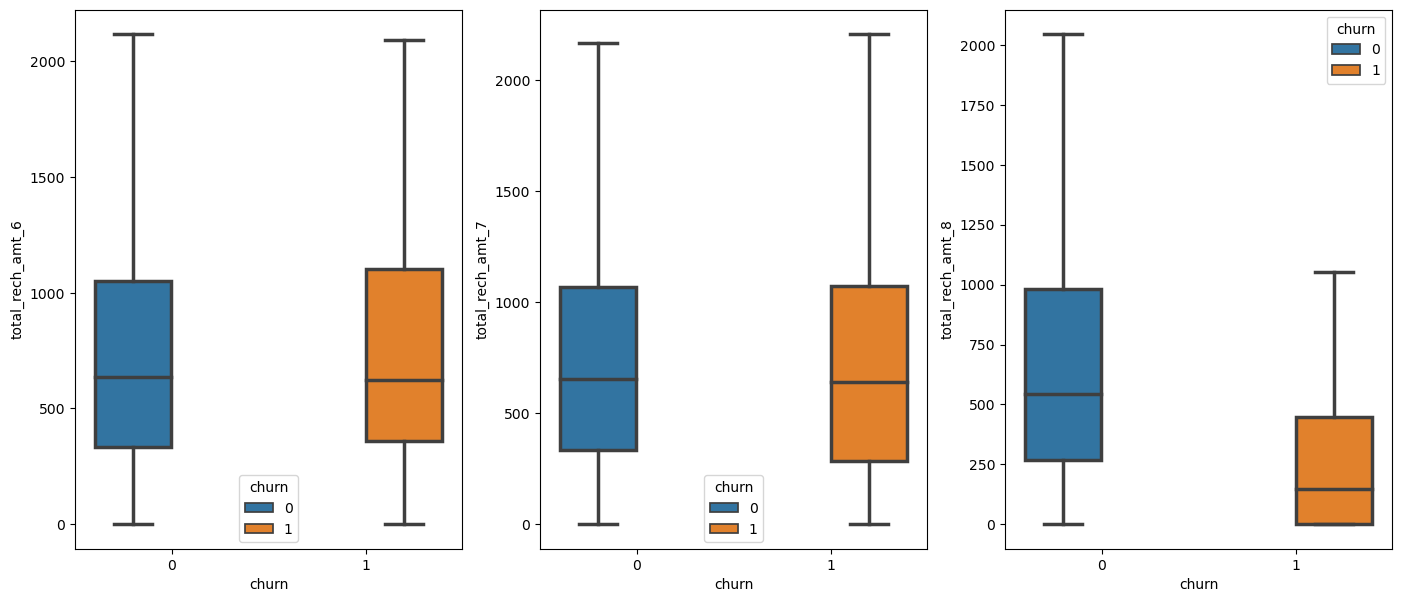

In [139]:
analyze_feature('total_rech_amt')

In [140]:
recharge_amnt_columns =  high_val_cust.columns[high_val_cust.columns.str.contains('rech_amt')]

recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'av_rech_amt_data_diff'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,189.16,197.80,189.36,184.49,205.43,193.19
Churned,203.40,200.78,129.64,248.43,256.10,254.17


<Figure size 1700x700 with 0 Axes>

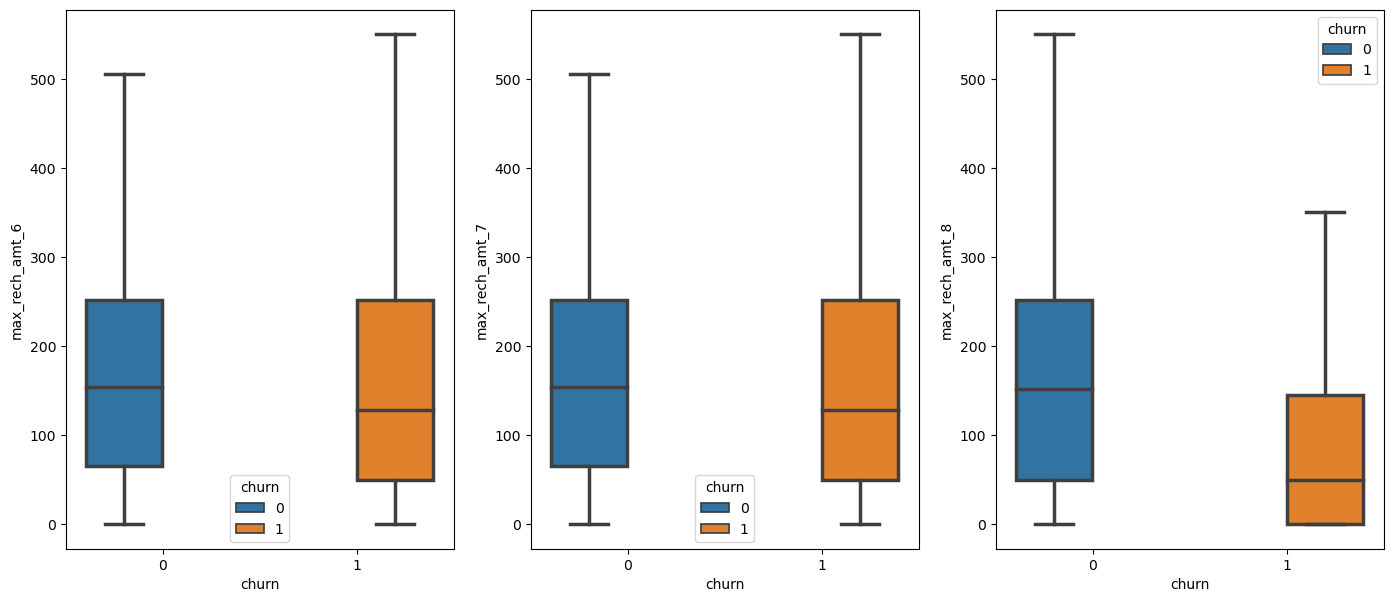

In [141]:
# let's analyze total recharge amount for data:
analyze_feature('max_rech_amt')

In [142]:
pd.crosstab(high_val_cust.churn, high_val_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,74.590164,97.233202,96.129032
1,25.409836,2.766798,3.870968


In [143]:
pd.crosstab(high_val_cust.churn, high_val_cust.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,18.0,19.0,20.0,21.0,23.0,25.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,
0,4154,565,172,90,67,65,38,27,21,15,...,2,1,3,3,2,1,1,1,1,1
1,259,19,0,5,4,2,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [145]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [146]:
# cap outliers in the numeric columns
high_val_cust[num_cols] = high_val_cust[num_cols].apply(cap_outliers, axis=0)

In [147]:
high_val_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,5572.0,5572.0,5572.0,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.0,0.0,0.0,653.480830,665.109410,593.042781,550.221544,170.343058,174.660746,157.294195,...,-0.011081,-8.425899,-2.382238,-89.728382,-7.044278,-0.989574,-16.832657,-64.958925,-54.590640,-101.711322
std,0.0,0.0,0.0,461.059918,469.074227,477.604574,473.924772,309.871103,327.812005,297.469567,...,0.119853,188.746181,6.010715,389.686627,102.431025,3.211192,88.355627,219.347634,289.810481,887.397541
min,0.0,0.0,0.0,0.000000,-0.172000,-17.854000,-43.500000,0.000000,0.000000,0.000000,...,-0.912057,-720.795777,-22.415485,-1391.360118,-404.378676,-11.933422,-328.404811,-794.322337,-1145.401938,-3389.414525
1%,0.0,0.0,0.0,61.834490,67.232220,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.376450,-720.795777,-21.500000,-1359.870000,-404.378676,-11.145000,-328.404811,-785.835000,-1145.401938,-3389.414525
10%,0.0,0.0,0.0,168.375800,178.373200,113.896200,56.391000,0.000000,0.000000,0.000000,...,-0.115000,-175.970500,-9.000000,-534.900000,-104.000000,-5.000000,-130.500000,-302.900000,-353.803500,-1000.888000
25%,0.0,0.0,0.0,294.649250,294.440250,230.646500,200.308500,6.137500,5.382500,4.510000,...,0.000000,-58.672500,-5.500000,-256.000000,-36.000000,-2.500000,-27.000000,-166.625000,-108.647500,-369.430000
50%,0.0,0.0,0.0,550.466000,565.459000,462.343500,426.981500,42.485000,40.635000,37.725000,...,0.000000,-2.582500,-2.500000,-69.000000,0.000000,-0.500000,0.000000,-60.000000,-10.602500,0.000000
75%,0.0,0.0,0.0,890.414750,903.781000,830.591750,781.538000,168.145000,167.172500,151.887500,...,0.000000,45.666250,0.500000,84.125000,22.000000,0.500000,1.000000,34.000000,17.943750,116.573750
90%,0.0,0.0,0.0,1276.042100,1303.460000,1267.560800,1211.347400,509.768000,515.258000,456.808000,...,0.000000,149.312000,4.000000,326.350000,85.000000,2.500000,57.950000,170.000000,140.695000,680.940000


In [148]:
#building the model now

# got numeric from
high_val_cust['churn'] = pd.to_numeric(high_val_cust['churn'])

In [149]:
X = high_val_cust.drop("churn", axis = 1)
y = high_val_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [150]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.262806
0.0     0.068493
1.0     0.026798
Name: churn, dtype: float64

In [151]:
y_test.shape

(1393,)

In [152]:
 y_train.shape

(4179,)

In [153]:
X_train.shape

(4179, 219)

In [154]:
X_test.shape

(1393, 219)

In [155]:
# replace categories with aggregated values
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [156]:
#datatypes 
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 3822 to 1584
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  4179 non-null   category
 1   night_pck_user_7  4179 non-null   category
 2   night_pck_user_8  4179 non-null   category
 3   fb_user_6         4179 non-null   category
 4   fb_user_7         4179 non-null   category
 5   fb_user_8         4179 non-null   category
dtypes: category(6)
memory usage: 57.9 KB


# PCA

In [157]:
(high_val_cust.isnull().sum()*100/high_val_cust.shape[0]).sort_values(ascending=False)

loc_og_t2o_mou      0.0
max_rech_data_6     0.0
max_rech_amt_7      0.0
max_rech_amt_8      0.0
max_rech_amt_9      0.0
                   ... 
total_og_mou_7      0.0
total_og_mou_8      0.0
total_og_mou_9      0.0
loc_ic_t2t_mou_6    0.0
vol_3g_mb_diff      0.0
Length: 220, dtype: float64

In [158]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [159]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [107]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.51
1       21.20
2       27.00
3       31.55
4       35.25
5       38.77
6       41.42
7       43.63
8       45.74
9       47.81
10      49.78
11      51.64
12      53.32
13      54.84
14      56.33
15      57.75
16      59.07
17      60.34
18      61.50
19      62.63
20      63.73
21      64.80
22      65.79
23      66.76
24      67.68
25      68.57
26      69.43
27      70.28
28      71.12
29      71.94
        ...  
189     99.96
190     99.96
191     99.97
192     99.97
193     99.97
194     99.98
195     99.98
196     99.98
197     99.98
198     99.99
199     99.99
200     99.99
201     99.99
202     99.99
203    100.00
204    100.00
205    100.00
206    100.00
207    100.00
208    100.00
209    100.00
210    100.00
211    100.00
212    100.00
213    100.00
214    100.00
215    100.00
216    100.00
217    100.00
218    100.00
Length: 219, dtype: float64


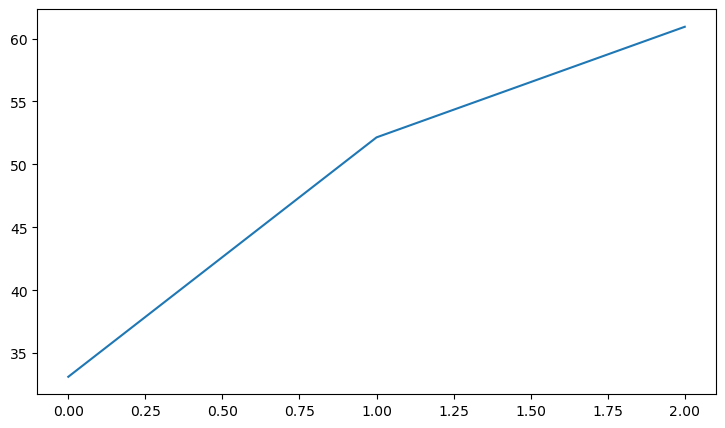

In [167]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [170]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),("pca", PCA(n_components=PCA_VARS)),("logistic", LogisticRegression(class_weight='balanced'))]
pipeline = Pipeline(steps)

In [171]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.9827709978463748

In [175]:
# predicting churn on test data
y_pred = pipeline.predict(X_test)

# creating confusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[1286   34]
 [   5   68]]
Sensitivity: 	0.93
Specificity: 	0.97
AUC:    	 0.99


# Hyperparameter tuning

In [176]:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

In [177]:
steps = [("scaler", StandardScaler()),("pca", PCA()),("logistic", logistic)]

In [178]:
# Compiling them
pca_logistic = Pipeline(steps)

In [179]:
param = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.4, 0.5], 'logistic__penalty': ['l1', 'l2']}

In [180]:
# 5Folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [181]:
# Model
model = GridSearchCV(estimator = pca_logistic, cv = fold, param_grid = param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [182]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.4, 0.5],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [183]:
# cross validation
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.378756,0.002000,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.331012,0.097151,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,0.201560,0.007941,0.012146,0.002330,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.993256,0.993687,0.993027,0.996123,0.992443,0.993707,0.001273,6
3,0.214001,0.007021,0.013745,0.003216,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.993457,0.994289,0.993543,0.997050,0.991610,0.993990,0.001766,5
4,0.144990,0.006718,0.000000,0.000000,0.4,l1,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
5,0.179254,0.004427,0.000000,0.000000,0.4,l1,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
6,0.197364,0.008887,0.014739,0.001000,0.4,l2,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.994031,0.994663,0.994835,0.997078,0.993363,0.994794,0.001254,4
7,0.243376,0.010171,0.015660,0.002133,0.4,l2,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.994749,0.995236,0.994663,0.997977,0.992932,0.995111,0.001632,3
8,0.147773,0.010622,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
9,0.228030,0.037095,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [184]:
# best hyperparameters score
model.best_score_

0.995306703107387

In [185]:
# best hyperparameters
model.best_params_

{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}

In [186]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),3))

[[1275   45]
 [   7   66]]
Sensitivity: 	0.9
Specificity: 	0.97
AUC:    	 0.985


Using random forest

In [187]:
frt = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [188]:
param = {"criterion": ['gini', 'entropy'], "max_features": [1]}

In [189]:
# creating folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [190]:
# Grid search
model = GridSearchCV(estimator=frt, cv=fold, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [191]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1]},
             scoring='roc_auc', verbose=1)

In [192]:
# best hyperparameters score
model.best_score_

0.9985424241553567

In [193]:
# best hyperparameters
model.best_params_

{'criterion': 'gini', 'max_features': 1}

In [131]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6859   22]
 [  62  546]]
Sensitivity: 	0.9
Specificity: 	1.0
AUC:    	 1.0


Looks like random forest is overfitting and the sensitivity is very low. So going with logistic and PCA

In [194]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))
rand_frt_model = RandomForestClassifier(n_estimators=100, max_features = max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=20, verbose=1)

In [195]:
# fiting the model
rand_frt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=15,
                       oob_score=True, random_state=20, verbose=1)

In [196]:
# checking OOB score
rand_frt_model.oob_score_

0.9995214166068438

In [197]:
# predicting churn on test data
y_pred = rand_frt_model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = rand_frt_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[1319    1]
 [   3   70]]
Sensitivity: 	0.96
Specificity: 	1.0
ROC:    	 1.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [198]:
# predictors
feature = high_val_cust.drop('churn', axis=1).columns

In [199]:
# feature_importance
importance = rand_frt_model.feature_importances_

In [200]:
# creating the dataframe
feature_imp = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_imp = feature_imp[['variables', 'importance_percentage']]

In [201]:
# sorting the features
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp.importance_percentage.sum())
feature_imp

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_9,8.135319
1,loc_ic_mou_9,7.854984
2,loc_ic_t2m_mou_9,7.730029
3,arpu_9,5.943081
4,max_rech_amt_9,5.759793
...,...,...
214,std_og_t2c_mou_6,0.000000
215,std_og_t2f_mou_7,0.000000
216,roam_og_mou_6,0.000000
217,loc_ic_t2o_mou,0.000000


In [202]:
# extract top 'n' features
top_features = feature_imp.variables[0:50]

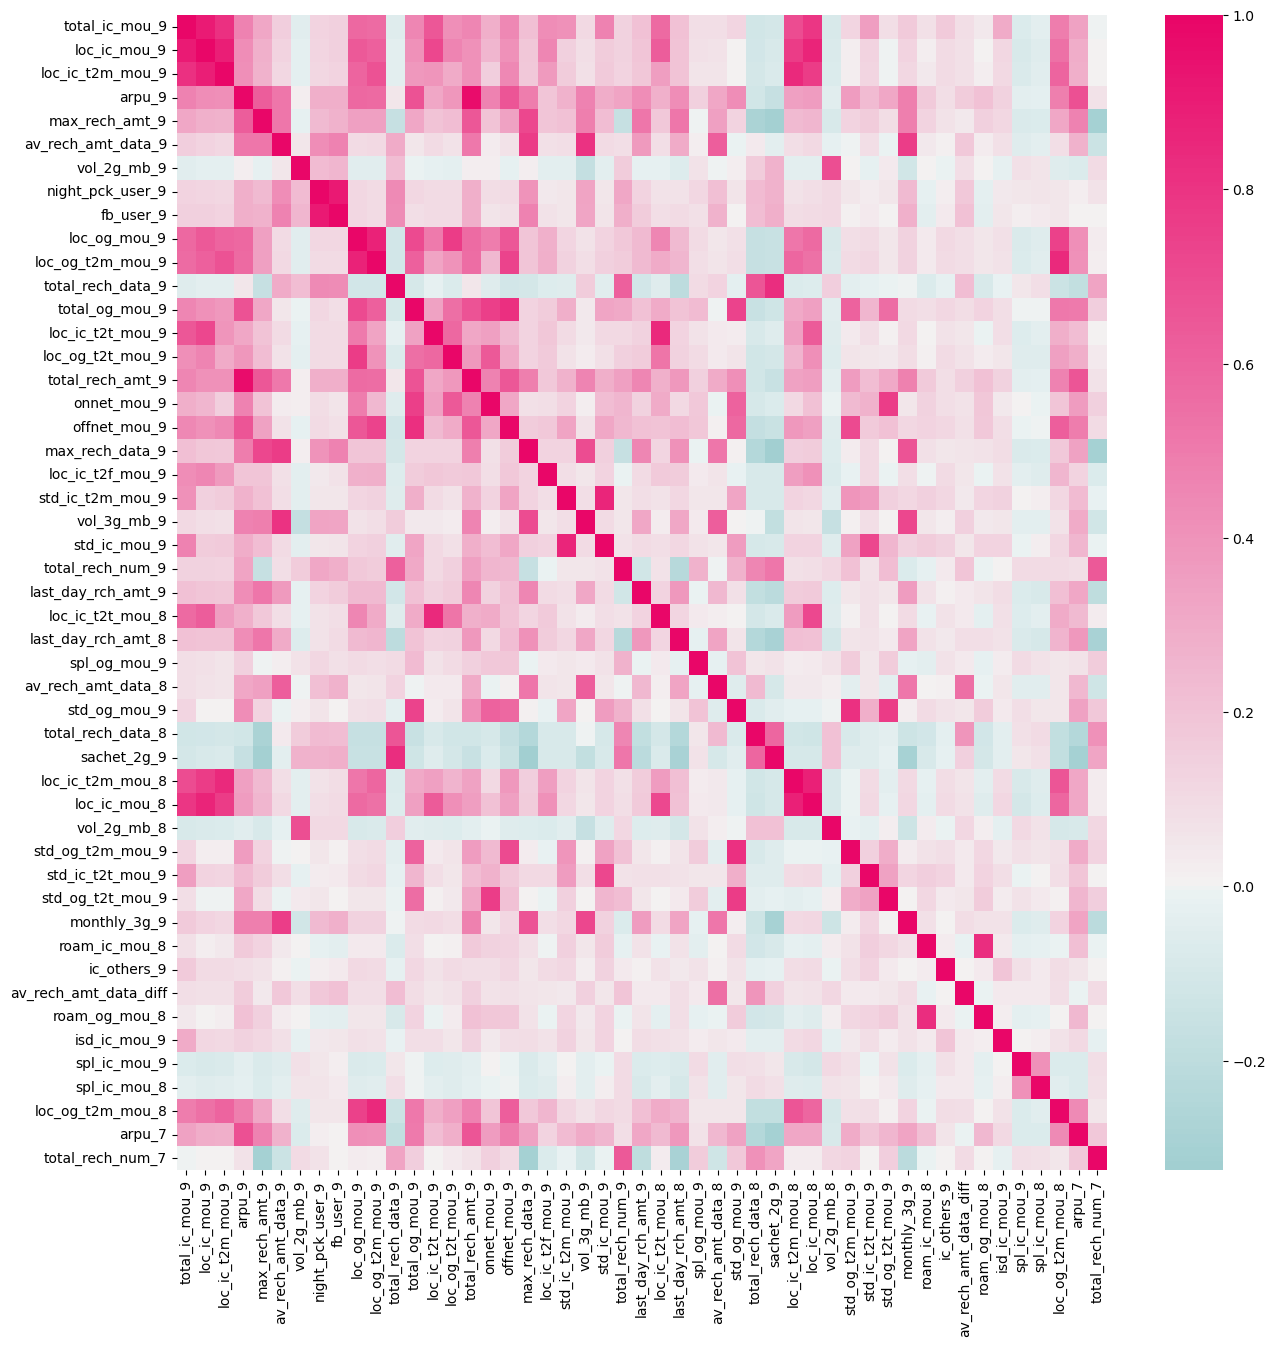

In [205]:
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed

# Define a custom color map for the heatmap
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)

# Create the correlation heatmap without annotations
sns.heatmap(data=X_train[top_features].corr(), center=0, cmap=mycmap, annot=False)

plt.show()


In [206]:
# Selecting features that are relevent
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [207]:
# logistic regression
step = [('scaler', StandardScaler()),("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# compiling
logistic = Pipeline(step)

# hyperparameter
param = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# 5 folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch
model = GridSearchCV(estimator = logistic, cv = fold, param_grid = param, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [208]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [209]:
# best hyperparameters score
model.best_score_

0.8583746556473828

In [210]:
# best hyperparameters
model.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l2'}

In [211]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[1179  141]
 [  25   48]]
Sensitivity: 	0.66
Specificity: 	0.89
ROC:    	 0.8


In [212]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [213]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [214]:
# coefficients
coefficient = logistic_model.coef_.reshape((9, 1)).tolist()
coefficient = [val for sublist in coefficient for val in sublist]
coefficient = [round(coefficient, 3) for coefficient in coefficient]
logistic_feature = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_feature)

In [215]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.902812,-0.900783,-0.79648,-1.390654,0.583311,0.034502,0.076822,0.036364,-1.107152,0.585987


### Steps to help reduce churn
- <br> Give special; discounts to customers according to their usage
- <br> Provide additional internet services on recharge.
- <br> Speak to customers to fulfil their desires.
- <br> Lower tariffs on data usage,a better 2G area coverage where 3G is not available.
- <br> Expansion of 3G network where 3G is currently not available.

Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.

Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

Average revenue per user seems to be most important feature in determining churn prediction.

Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour

Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.